# ModSim: HIV Model 
## Shreya Chowdhary - Section 1

In [5]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [32]:
def make_system(gamma, mu, beta, ro, alpha, delta, sigma, pi):
    '''
    Makes a system object for the HIV model. 
    gamma: affects the rate of creation of new uninfected cells 
    mu: affects the rate of HIV-independent death of uninfected cells/latently infected cells
    beta: affects rate of activation
    ro: proportion of cells that are latent (1-p = proprotion that are activated)
    alpha: affects the rate of activation
    delta: affects the rate of HIV-independent death of actively infected cells
    sigma: affects the rate of removal of virions
    pi: affects the rate of production of virions by actively infected cells
    activation_rate: rate of new infected cells arising
    latent_to_activated_rate: rate of latently infected cells becoming actively infected cells 
    '''
    
    init = State(R = 200, L = 0, E = 0, V = 100)
    
    t0 = 0 
    t_end = 120 # infection usually lasts 120 days?
    dt = 0.5
    
    return System(init = init, t0 = 0, t_end = t_end, gamma_tau = gamma, mu = mu, beta = beta, 
                  ro = ro, alpha = alpha, delta = delta, pi = pi, sigma = sigma, dt = dt)

def update_func(state, t, system):
    r = state.R 
    l = state.L
    e = state.E
    v = state.V
    unpack(system)
    
    infected = beta*r*v
    activated = alpha*l
    
    r += (gamma_tau - mu*r - infected)*dt
    l += (ro*infected - mu*l - activated)*dt
    e += ((1 - ro)*infected + activated - delta*e)*dt
    v += (pi*state.E - sigma*v)*dt
    
    return State(R = r, L = l, E = e, V = v)

In [33]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """ 
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [34]:
def plot_results(R, L, E):
    plot(R, 'm-', label = "R")
    plot(L, 'g-', label = "L")
    plot(E, 'b-', label = "E")
    decorate(title = "HIV Infection", 
            xlabel = "Time", 
            ylabel = "Number of Cells")

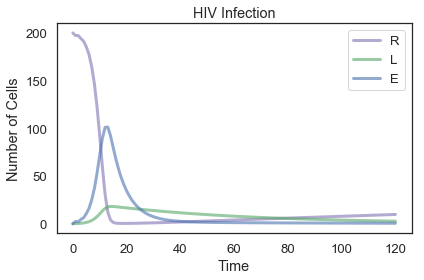

In [35]:
gamma = 1.36*0.2
mu = 1.36e-3
beta = 0.00027
ro = 0.1
alpha = 3.6e-2
sigma = 2
delta = 0.33
pi = 100

sys = make_system(gamma, mu, beta, ro, alpha, delta, sigma, pi)
results = run_simulation(sys, update_func)
plot_results(results.R, results.L, results.E)